**Livanty Efatania - 0706022210041**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [254]:
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/Bank.csv', delimiter=";") #Membaca file data csv
df.head() #Menunjukan 5 data teratas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [255]:
# untuk menampilkan ringkasan informasi tentang struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [256]:
# menghitung data unkonwon pada setiap kolom
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts)

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [257]:
# untuk mengetahui unique value beserta jumlahnya
for col in df:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


Value counts for job:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for education:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for default:
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for balance:
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Le

In [258]:
# Replace 'admin' and 'management' with 'admin_management' in the 'job' column
df['job'] = df['job'].replace(['admin', 'management'], 'admin_management')

Text(0.5, 1.0, 'Boxplot of Duration by Target (y)')

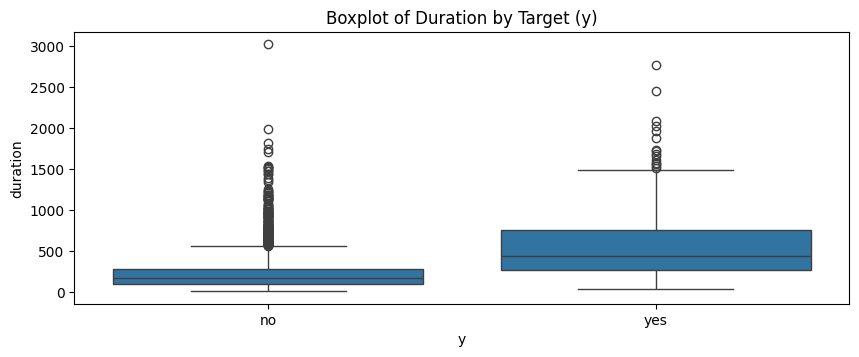

In [259]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 12))

# Boxplot untuk 'duration'
plt.subplot(3, 1, 1)
sns.boxplot(x='y', y='duration', data=df)
plt.title('Boxplot of Duration by Target (y)')

# boxplot ini menunjukkan adanya hubungan potensial antara duration dengan kemungkinan mendapatkan respons yes.

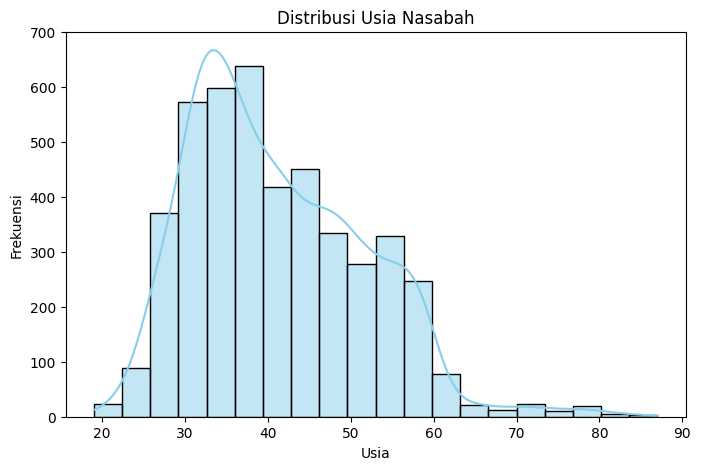

In [260]:
# histogram distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()
#Histogram ini menunjukkan distribusi usia nasabah.
#Terlihat bahwa usia nasabah paling banyak berada di rentang 30 hingga 40 tahun, dengan frekuensi puncak di sekitar usia 30-an. Distribusi usia cenderung miring ke kanan, dengan sedikit nasabah yang berusia di atas 60 tahun.

In [261]:

# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,1,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,1,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,2,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


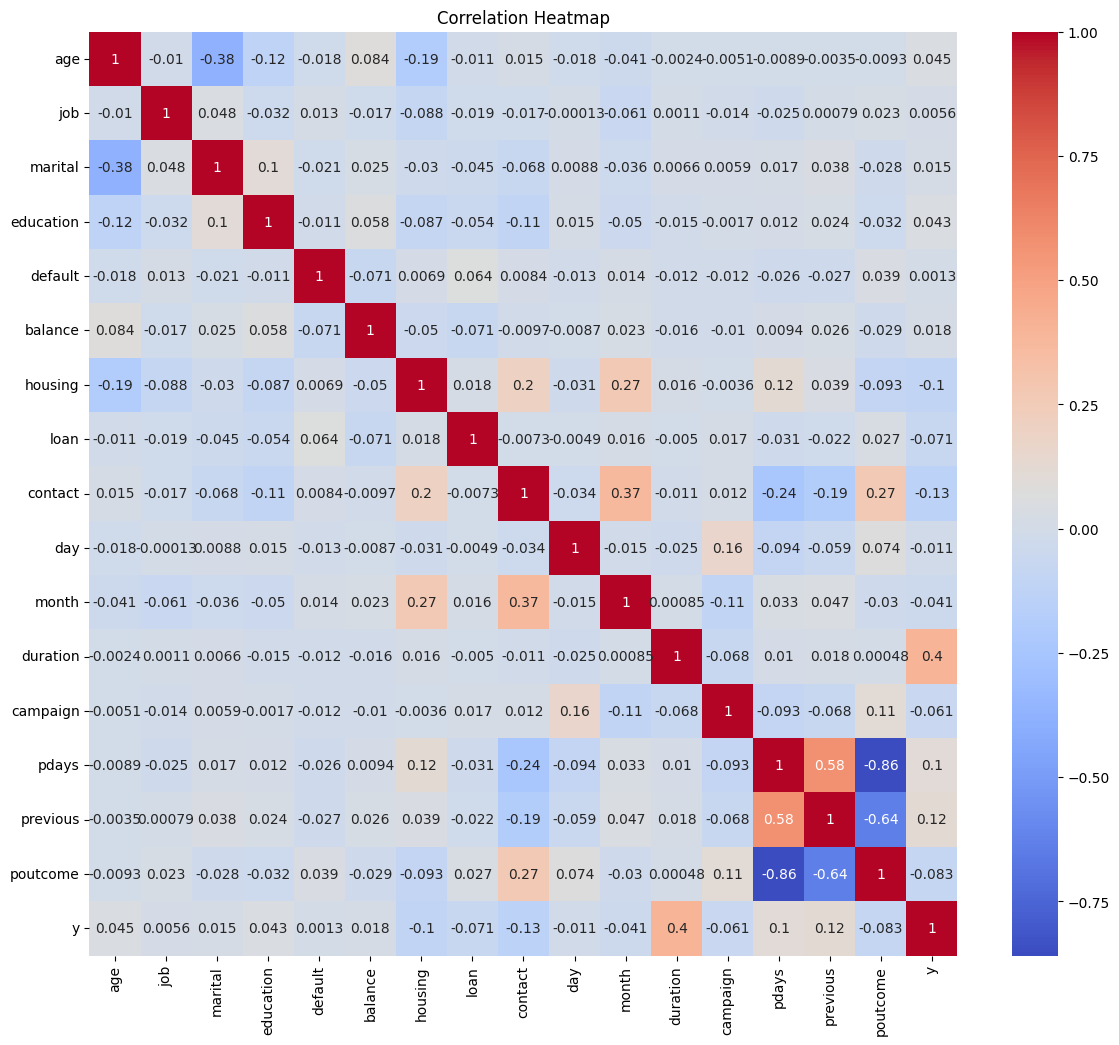

In [262]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul
plt.title('Correlation Heatmap')
plt.show()


## Machine Learning (Split Data)

In [263]:
# Saya memilih duration, pdays, previous ini karena ketiga ini memiliki korelasi yang lumayan tinggi
X = df[['duration', 'pdays', 'previous']]
y = df['y']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [265]:
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((3616, 3), (905, 3))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [266]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [267]:
y_pred_en = rf_clf.predict(X_test)

In [268]:
print('Model accuracy score with random forest: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with random forest: 0.8884


In [269]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 0.9574
Test set score: 0.8884


In [270]:
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[769  38]
 [ 63  35]]


In [271]:
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       807
           1       0.48      0.36      0.41        98

    accuracy                           0.89       905
   macro avg       0.70      0.66      0.67       905
weighted avg       0.88      0.89      0.88       905



In [272]:
# Apply SMOTEEN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [274]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
y_pred_en = rf_clf.predict(X_test)

In [276]:
print('Model accuracy score with random forest after SMOTEENN: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with random forest after SMOTEENN: 0.9931


In [277]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9931


In [278]:
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[577   5]
 [  2 434]]


In [279]:
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       582
           1       0.99      1.00      0.99       436

    accuracy                           0.99      1018
   macro avg       0.99      0.99      0.99      1018
weighted avg       0.99      0.99      0.99      1018



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).


In [281]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42,
                                     max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [282]:
y_pred_en = gbc_clf.predict(X_test)

In [283]:
print('Model accuracy score with Gradient Boosting Classifier: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with Gradient Boosting Classifier: 0.8939


In [284]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gbc_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

Training set score: 0.9165
Test set score: 0.8939


In [285]:
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[784  23]
 [ 73  25]]


In [286]:
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.52      0.26      0.34        98

    accuracy                           0.89       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.89      0.88       905



In [287]:
# Apply SMOTE
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [289]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42,
                                     max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [290]:
y_pred_en = gbc_clf.predict(X_test)

In [291]:
print('Model accuracy score with Gradient Boosting Classifier after SMOTEENN: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with Gradient Boosting Classifier after SMOTEENN: 0.9763


In [292]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gbc_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

Training set score: 0.9896
Test set score: 0.9763


In [293]:
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[584  17]
 [  7 406]]


In [294]:
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       601
           1       0.96      0.98      0.97       413

    accuracy                           0.98      1014
   macro avg       0.97      0.98      0.98      1014
weighted avg       0.98      0.98      0.98      1014



Pada EDA ini saya tidak melakukan drop data karena ada 3/4 dari data yang unknown, disini saya membiarkan data yang ada dan tidak mereplace juga dikarenakanm X saya disini tidak menggunakan data/kolom yang ada uknownnya sehingga tidak mempengaruhi model.
Saya juga menggunakan SMOTEENN yaitu menambahkan data sintetik pada kelas minoritas untuk mengatasi ketidakseimbangan, sedangkan ENN menghapus sampel kelas mayoritas yang sulit diklasifikasikan (misclassified) oleh tetangga terdekatnya. Kombinasi ini membantu membersihkan data secara lebih menyeluruh, meningkatkan pemisahan antara kelas minoritas dan mayoritas, dan menghasilkan model yang lebih akurat.

Model accuracy score with random forest: 0.8884

Model accuracy score with random forest after SMOTEENN: 0.9931

Model accuracy score with Gradient Boosting Classifier: 0.8939

Model accuracy score with Gradient Boosting Classifier after SMOTEENN: 0.9763


Kesimpulannya dari dataset ini akurasi memprediksi menjadi naik ketika di SMOTTEN dan dari hasil yang kiat dapat model random forest bisa memprediksi lebih baik dari pada gradient boosting classifier setelah di SMOTEEN.






